In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_json("./levels.fyi.salaryData.json");
df = df.replace("", np.nan)

df = df.astype({
    'yearsofexperience': 'float',
    'basesalary': 'float',
    'bonus': 'float',
    'stockgrantvalue': 'float',
    'totalyearlycompensation': 'float',
    'yearsatcompany': 'float',
    'timestamp': 'datetime64',
})

def create_outlier_filter(df, column_names):
    def filter_outliers(lower_bound, upper_bound):
        filtered_df = df
    
        for column_name in column_names:
            column = filtered_df[column_name]

            lower_2s = column.quantile(lower_bound)
            upper_2s = column.quantile(upper_bound)
            column_mask = (column >= lower_2s) & (column <= upper_2s)

            filtered_df = filtered_df[column_mask]

        return filtered_df
    
    return filter_outliers;

filter_outliers = create_outlier_filter(df, [
    'totalyearlycompensation',
    'basesalary',
    'bonus',
    'stockgrantvalue',
    'yearsatcompany',
    'yearsofexperience',
])

df = filter_outliers(0.02, 0.98)

In [2]:
financial_df = df[[
    'totalyearlycompensation',
    'basesalary',
    'bonus',
    'stockgrantvalue',
    'yearsatcompany',
    'yearsofexperience',
]]
financial_desc_df = financial_df.describe().drop('count').round(1)
display(financial_desc_df)

,totalyearlycompensation,basesalary,bonus,stockgrantvalue,yearsatcompany,yearsofexperience
mean,198.2,138.9,17.5,42.0,2.3,6.4
std,87.2,40.5,15.6,49.6,2.5,4.9
min,42.0,42.0,0.0,0.0,0.0,0.0
25%,136.0,112.0,5.0,2.0,0.0,3.0
50%,182.0,140.0,15.0,25.0,2.0,5.0
75%,246.0,165.0,25.0,60.0,3.0,10.0
max,580.0,267.0,80.0,236.0,13.0,20.0


<AxesSubplot:>

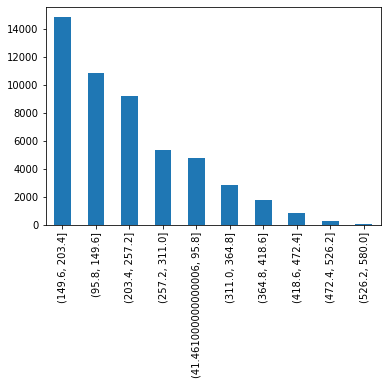

In [3]:
fig, ax = plt.subplots()
df['totalyearlycompensation'].value_counts(bins=10).plot(ax=ax, kind='bar')

<AxesSubplot:>

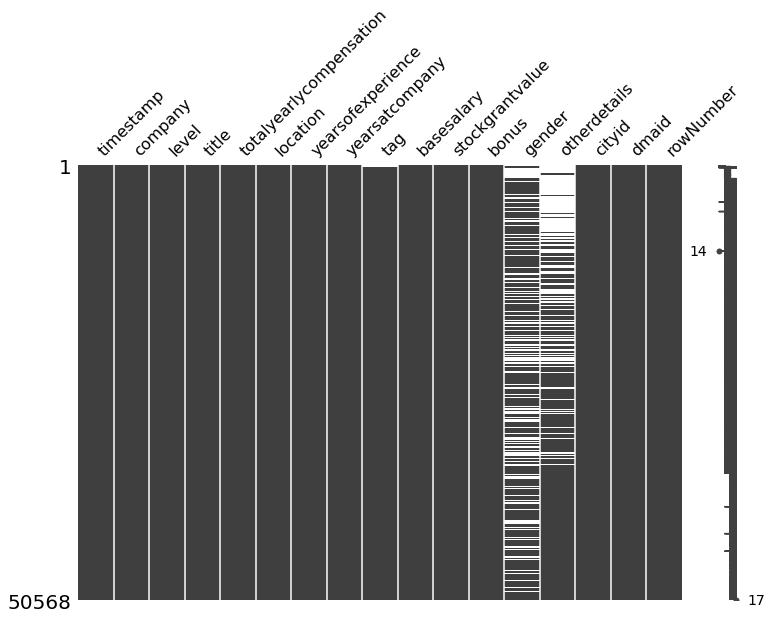

In [4]:
import missingno as msno

msno.matrix(df, figsize=(12, 8))